# The Sparks Foundation

# Kiran L. Ware , Data Science and Business Analytics Intern.

Task 6: Create the Decision Tree classifier and visualize it graphically.
* The purpose is if we feed any new data to this classifier, it would be able to
  predict the right class accordingly.

* Steps which we follow during this task are:
    * Import required libraries
    * Reading the dataset
    * Preparing the Data
    * Training Model
    * make Predictions
    * Evaluating Model
    * Visualization

# Import Required Libraries 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Given Dataset

In [2]:
df = pd.read_csv(r'K:\\machine learning\\sparks foundation internship\\iris_dataset.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


* rename Columns Name.

In [3]:
df = df.rename(columns = {'SepalLengthCm':'Sepal-Length','SepalWidthCm':'Sepal-Width','PetalLengthCm':'Petal-Length',
                         'PetalWidthCm':'Petal-Width'})

In [4]:
df.head()

,Id,Sepal-Length,Sepal-Width,Petal-Length,Petal-Width,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 6)

* 150 rows and 6 columns in given dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            150 non-null    int64  
 1   Sepal-Length  150 non-null    float64
 2   Sepal-Width   150 non-null    float64
 3   Petal-Length  150 non-null    float64
 4   Petal-Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


* Id column is not needed for predictions so we drop it.

In [7]:
df = df.drop(columns=['Id'])
df.head()

,Sepal-Length,Sepal-Width,Petal-Length,Petal-Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.describe()

,Sepal-Length,Sepal-Width,Petal-Length,Petal-Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
from sklearn.preprocessing import LabelEncoder
df['Species'] = LabelEncoder().fit_transform(df['Species'])

* show correlation using heatmap.

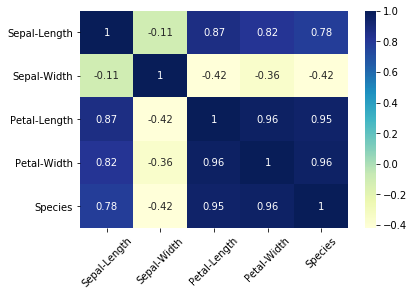

In [10]:
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.xticks(rotation=45)
plt.show()

* Species are more correlate with petal-width & Petal-Length.

* plot pairplot.

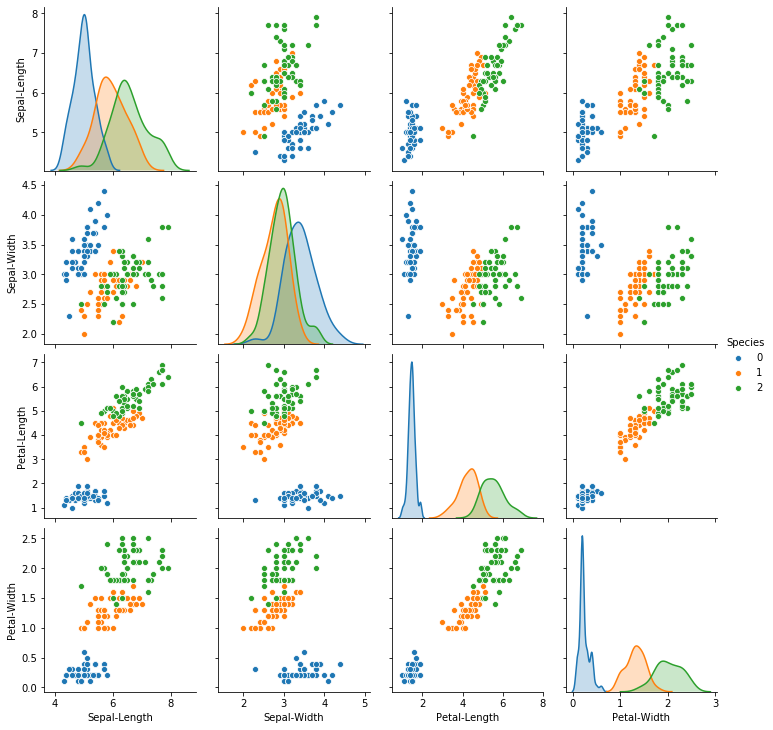

In [11]:
sns.pairplot(df,hue='Species')
plt.show()

# Preparing the data

In [12]:
data = df.values
X = data[:,0:4]  # First 4 Columns
y = data[:,4]   # last column

* split dataset into training and testing dataset.

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

* Here we use DecisionTreeClassifier Algorithm.

In [15]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Make Predictions.

In [16]:
predict_species = model.predict(X_test)
predict_species

array([0., 1., 1., 0., 2., 1., 2., 0., 0., 2., 1., 0., 2., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 2., 0., 2., 1., 0., 0., 1., 2.])

* Here above we get Predicted Values

* And here we print orginal result and check difference between predicted & original output.

In [17]:
y_test

array([0., 1., 1., 0., 2., 1., 2., 0., 0., 2., 1., 0., 2., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 2., 1., 0., 0., 1., 2.])

* But here only 30 values so this is easy but if we have data in millions then its not easy so we check accuracy between original and predicted output using 'Score' function.

# Evaluating model or Check Accuracy of the Model.

In [18]:
print('accuracy_score =',model.score(X_test,y_test))

accuracy_score = 0.9666666666666667


* We get 96.67% accuracy.

* Here just we take one random example and check output.
    * Sepal-Length : 5.2
    * Sepal-Width : 3.1
    * Petal-Length : 1.8
    * Petal-Width : 0.7

In [19]:
task_prediction = model.predict([[5.2,3.1,1.8,0.7]])
print('Task Prediction Result =',task_prediction)

Task Prediction Result = [2.]


* Here we get Output 2 means from 'virginica' species.

# Visualization of Tree

|--- feature_2 <= -0.69
|   |--- class: 0.0
|--- feature_2 >  -0.69
|   |--- feature_3 <= 0.56
|   |   |--- feature_2 <= 0.65
|   |   |   |--- class: 1.0
|   |   |--- feature_2 >  0.65
|   |   |   |--- feature_3 <= 0.43
|   |   |   |   |--- class: 2.0
|   |   |   |--- feature_3 >  0.43
|   |   |   |   |--- feature_0 <= 0.92
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_0 >  0.92
|   |   |   |   |   |--- class: 2.0
|   |--- feature_3 >  0.56
|   |   |--- feature_2 <= 0.59
|   |   |   |--- feature_1 <= 0.20
|   |   |   |   |--- class: 2.0
|   |   |   |--- feature_1 >  0.20
|   |   |   |   |--- class: 1.0
|   |   |--- feature_2 >  0.59
|   |   |   |--- class: 2.0



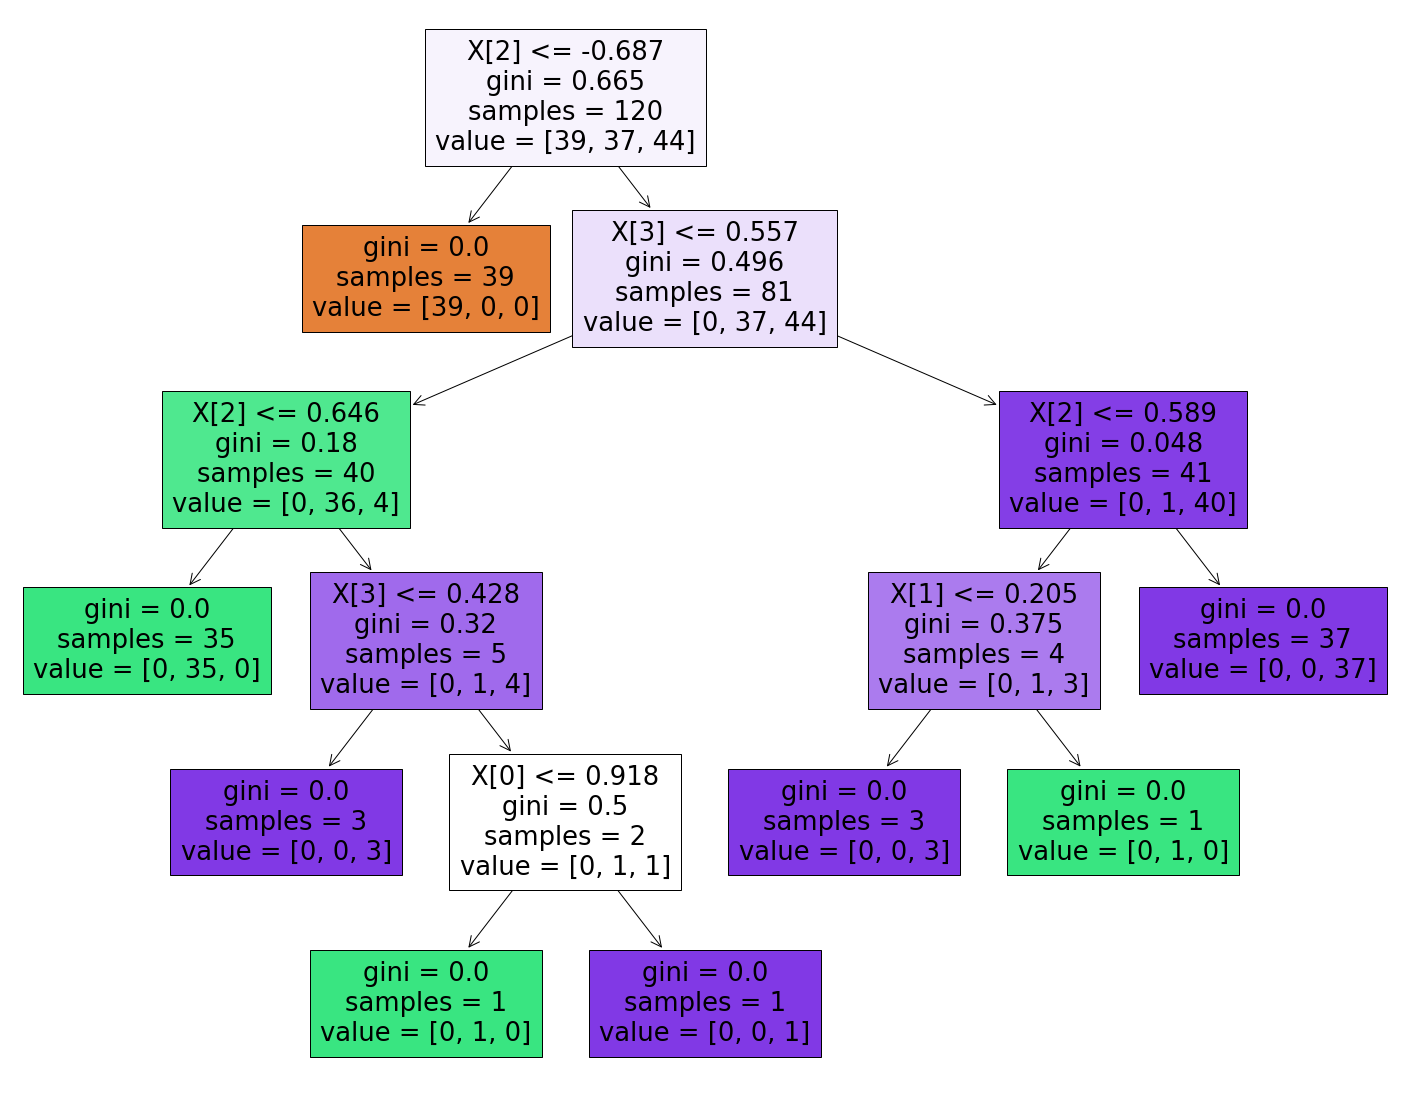

In [20]:
from sklearn import tree
plt.figure(figsize=(25,20))
tree.plot_tree(model,filled=True)
text_representation = tree.export_text(model)
print(text_representation)

# Thank You..!